# Demo Training & Testing of Word-Level Lip reading Model

### 0. Getting All necessary Dependencies

In [1]:
# Import the required libraries.
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *

%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [2]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [3]:
# Making sure TF uses GPU
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### 0. Tmp video visual 

In [6]:
from align import read_align

file_dir = "..\\Dataset\\Urdu\\3\\aap_kese_hoon_jee_kon_aath"

align = read_align(file_dir)

print(align)

[['س', '0.0', '0.0227'], ['آپ', '0.0227', '0.3861'], ['کیسے', '0.3861', '0.9462'], ['ہوں', '0.9462', '1.2736'], ['جی', '1.2736', '1.7089'], ['کون', '1.7089', '2.1366'], ['آٹھ', '2.1366', '2.4867'], ['س', '2.4867', '3.52']]


In [7]:


# loading video dsa gfg intro video
clip = VideoFileClip(file_dir + "\\_video.avi")
audio = AudioFileClip(file_dir + "\\_audio.wav")

clip.audio = audio


# clipping of the video
# getting video for only starting 10 seconds
clip = clip.subclip(align[4][1], align[4][2])

# showing clip
clip.ipython_display(width = 280)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [10]:
# Augmentation visual
clip2 = VideoFileClip(file_dir + "\\_video.avi")
reversed_clip = clip.fx(vfx.mirror_x)
# showing clip
reversed_clip.ipython_display(width = 280)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


### 1. Visualizing Dataset

In [4]:
from videos import *

In [5]:
# loading video dsa gfg intro video
clip = VideoFileClip("..\\Dataset\\Urdu\\3\\aap_kese_hai_jee_kyun_do\\_video.avi")

frames = clip_to_list(clip, 7)
#read_and_segment_video("..\\Dataset\\Urdu\\3\\aap_kese_hai_jee_kyun_do")

In [6]:
len(frames)

7

In [7]:
len(vid)

NameError: name 'vid' is not defined

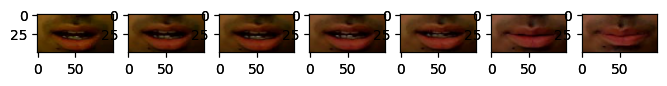

In [8]:
import numpy as np
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 7
rows = 5
ind = 0
for i in range(1, columns*rows +1):
    img = frames[ind]
    fig.add_subplot(rows, columns, i)
    img = cv2.flip(img, 1)
    plt.imshow(img)
    ind+=1
    if(ind >= 7):
        break
ind = 0
for i in range(1, columns*rows +1):
    img = frames[ind]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    ind+=1
    if(ind >= 7):
        break
plt.show()

In [5]:
s = np.array(frames)

In [6]:
s.shape

(90, 100, 150, 3)

In [7]:
l =     read_and_segment_video("..\\Dataset\\Urdu\\2\\aap_kese_hoon_jee_kon_aath")

15
11
14
9
9
11
12
11


### 2. Getting Dataset

In [5]:
# Getting dataset generation function
from Dataset import create_word_level_dataset

In [6]:
CLASSES_LIST = ['ہے', 'کیسے', 'چار', 'دو', 'چھے', 'وہ', 'جی', 'کب', 'پانچھ', 'تین', 'آپ', 'نوں', 'ہاں', 'میں', 'تھا', 'ہوں', 'نہیں', 'کیوں', 'کتنے', 'ایک', 'کون', 'تھے', 'ہم', 'آٹھ', 'کونسا', 'کدھر', 'سات']

In [7]:
print(CLASSES_LIST)

['ہے', 'کیسے', 'چار', 'دو', 'چھے', 'وہ', 'جی', 'کب', 'پانچھ', 'تین', 'آپ', 'نوں', 'ہاں', 'میں', 'تھا', 'ہوں', 'نہیں', 'کیوں', 'کتنے', 'ایک', 'کون', 'تھے', 'ہم', 'آٹھ', 'کونسا', 'کدھر', 'سات']


In [8]:
print(len(CLASSES_LIST))

27


In [20]:
np.save("D://FYP Workspace//Urdu Preprocessed numpy//7_features", features)
np.save("D://FYP Workspace//Urdu Preprocessed numpy//7_labels", labels)

In [3]:
#features = np.load("D://FYP Workspace//Urdu Preprocessed numpy//4_features.npy")
#labels = np.load("D://FYP Workspace//Urdu Preprocessed numpy//4_labels.npy")

# Loading Oversampled s4 data
tmp_f = np.load("D:\\FYP Workspace\\Urdu Preprocessed numpy\\Oversampled\\6_features.npy")
tmp_l = np.load("D:\\FYP Workspace\\Urdu Preprocessed numpy\\Oversampled\\6_labels.npy")

# Splitting features in half to reduce batch size
# - First half
#features = tmp_f[ : int(len(tmp_f)/2)]
#labels = tmp_l[ : int(len(tmp_f)/2)]

# - Second half
features = tmp_f[ int(len(tmp_f)/2) : ]
labels = tmp_l[ int(len(tmp_f)/2) : ]

print(features.shape)
print(labels.shape)

(1188, 13, 50, 100, 3)
(1188,)


In [24]:

features = np.load("6_featureso.npy")
labels = np.load("6_labelso.npy")


In [11]:
a = np.array([2,4,6])
print(a[:1])

[2]


Note :
  STATS of 1 Speaker
- 788 segments with sil AND 619 without sil
- 619 without Augmentation AND 1238 with Augmentation

In [26]:
print(len(features))
print(len(labels))

1296
1296


In [27]:
# Getting frequency of each class for Display
import collections

# using Counter to find frequency of labels
frequency = collections.Counter(labels)

print("BEFORE - OVERSAMPLING")
print("TOTAL CLASSES : " , len(CLASSES_LIST))
print("\nFRQ   CLASS")
for key in frequency:
    print(CLASSES_LIST[key], frequency[key])

BEFORE - OVERSAMPLING
TOTAL CLASSES :  27

FRQ   CLASS
وہ 56
کیسے 54
ہوں 36
جی 72
کب 88
ایک 24
آپ 52
ہے 50
کیوں 56
دو 24
تھا 68
تین 24
میں 52
تھے 62
چار 24
پانچھ 24
ہم 56
چھے 24
سات 24
کون 72
آٹھ 24
نوں 24
ہاں 72
نہیں 72
کونسا 54
کدھر 54
کتنے 54


In [38]:
frequency.keys()

dict_keys([5, 1, 15, 6, 7, 19, 10, 0, 17, 3, 14, 9, 13, 21, 2, 8, 22, 4, 26, 20, 23, 11, 12, 16, 24, 25, 18])

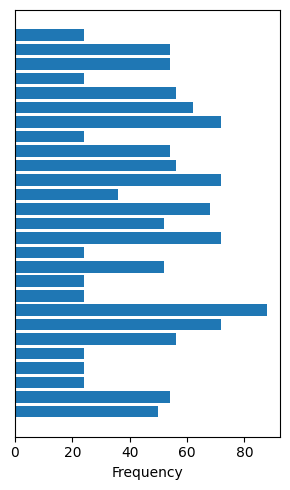

In [62]:
plt.figure(figsize=(3,5))
x = list(frequency.keys())
y = list(frequency.values())
# Plot bar chart with data points
plt.barh(x,y)

plt.xlabel("Frequency")
plt.ylabel("Word")
# Display the plot
plt.gca().axes.get_yaxis().set_visible(False)
plt.ylabel("Word")
plt.show()

### 2.5 Doing Oversampling to overcome imbalanced Dataset

In [9]:
del tmp_features
del tmp_labels

NameError: name 'tmp_features' is not defined

In [64]:
import collections
# Performing over-sampling
tmp_features = features.tolist()
tmp_labels = labels.tolist()
# using Counter to find frequency of labels
tmp_freq = collections.Counter(tmp_labels)

In [17]:
print("BEFORE - OVERSAMPLING")
print("TOTAL CLASSES : " , len(CLASSES_LIST))
print("\nFRQ   CLASS")
for key in tmp_freq:
    print(CLASSES_LIST[key], '  ', tmp_freq[key])

BEFORE - OVERSAMPLING
TOTAL CLASSES :  27

FRQ   CLASS
وہ    56
کیسے    54
ہوں    36
جی    72
کب    88
ایک    24
آپ    52
ہے    50
کیوں    56
دو    24
تھا    68
تین    24
میں    52
تھے    62
چار    24
پانچھ    24
ہم    56
چھے    24
سات    24
کون    72
آٹھ    24
نوں    24
ہاں    72
نہیں    72
کونسا    54
کدھر    54
کتنے    54


In [18]:
min(tmp_freq.values())
tmp_freq.values()

dict_values([56, 54, 36, 72, 88, 24, 52, 50, 56, 24, 68, 24, 52, 62, 24, 24, 56, 24, 24, 72, 24, 24, 72, 72, 54, 54, 54])

In [65]:

# Getting freq of most freq class and dividing by 2
highest_freq = max(tmp_freq.values()) / 2  

# Oversampling dataset
i = 0
while i < len(tmp_labels):
    
    #Current class index
    current_class_index = tmp_labels[i]
    
    # Variable for current class
    current_class = CLASSES_LIST[tmp_labels[i]]
    
    # Variable for current class's frequqncy
    current_class_freq = tmp_freq[current_class_index]
    
    # Any class which has frequency less than of most_freq class will be duplicated
    if current_class_freq < highest_freq:
        
        # Appending duplicate at the end of list
        tmp_features.append(tmp_features[i])
        tmp_labels.append(tmp_labels[i])
    
        # Updating frequency of duplicated class
        tmp_freq[current_class_index] += 1
    
    # if a class has higher frq than max accepted then delete its occurence
    elif current_class_freq > highest_freq:
        
        # Appending duplicate at the end of list
        tmp_features.remove(tmp_features[i])
        tmp_labels.remove(tmp_labels[i])
    
        # Updating frequency of duplicated class
        tmp_freq[current_class_index] -= 1
    
    # Re-iterating over list if oversampling not complete
    if i == (len(tmp_labels) - 1) and min(tmp_freq.values()) < highest_freq:
        print(min(tmp_freq.values()))
        i = 0
    
    if i==0:
        print("hello")
    i += 1

print(len(tmp_features))

hello
1188


In [20]:
print(highest_freq)
print(min(tmp_freq.values()))
print(tmp_freq.get(0))
print(len(tmp_features))

88
88
88
2376


In [66]:
# Displaying frequency of Oversampled Dataset

# using Counter to find frequency of labels
#tmp_freq = collections.Counter(tmp_labels)

print("AFTER - OVERSAMPLING")
print("TOTAL CLASSES : " , len(CLASSES_LIST))
print("\nFRQ   CLASS")
for key in tmp_freq:
    print(CLASSES_LIST[key], "  " , tmp_freq[key])

AFTER - OVERSAMPLING
TOTAL CLASSES :  27

FRQ   CLASS
وہ    44
کیسے    44
ہوں    44
جی    44
کب    44
ایک    44
آپ    44
ہے    44
کیوں    44
دو    44
تھا    44
تین    44
میں    44
تھے    44
چار    44
پانچھ    44
ہم    44
چھے    44
سات    44
کون    44
آٹھ    44
نوں    44
ہاں    44
نہیں    44
کونسا    44
کدھر    44
کتنے    44


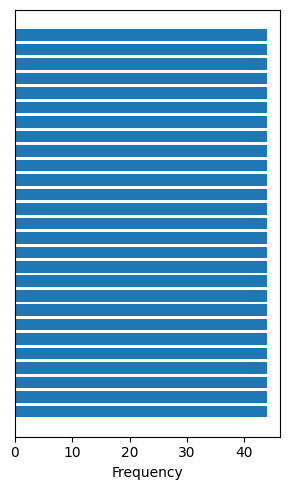

In [67]:
plt.figure(figsize=(3,5))
x = list(tmp_freq.keys())
y = list(tmp_freq.values())
# Plot bar chart with data points
plt.barh(x,y)

plt.xlabel("Frequency")
plt.ylabel("Word")
# Display the plot
plt.gca().axes.get_yaxis().set_visible(False)
plt.ylabel("Word")
plt.show()

In [73]:
del features
del labels
features = np.array(tmp_features)
labels = np.array(tmp_labels)

In [87]:
np.save("D://FYP Workspace//Urdu Preprocessed numpy//Oversampled//6_features_44", features)
np.save("D://FYP Workspace//Urdu Preprocessed numpy//Oversampled//6_labels_44", labels)

In [25]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

In [26]:
# Split the Data into Train ( 75% ) and Test Set ( 25% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.20, shuffle = True,
                                                                            random_state = seed_constant)

In [6]:
features.shape

(1188, 13, 50, 100, 3)

In [7]:
print(labels_train.shape)
print(labels_test.shape)

(950, 27)
(238, 27)


### 3. Training Model

In [4]:
# Important variables DEFINED IN PREPROCESSOR FILES
SEQUENCE_LENGTH = 15 
IMAGE_HEIGHT = 50 
IMAGE_WIDTH = 100
CLASSES_LIST = ['ہے', 'کیسے', 'چار', 'دو', 'چھے', 'وہ', 'جی', 'کب', 'پانچھ', 'تین', 'آپ', 'نوں', 'ہاں', 'میں', 'تھا', 'ہوں', 'نہیں', 'کیوں', 'کتنے', 'ایک', 'کون', 'تھے', 'ہم', 'آٹھ', 'کونسا', 'کدھر', 'سات']

In [5]:
def create_LRCN_model():
    '''
    This function will construct the required LRCN model.
    Returns:
        model: It is the required constructed LRCN model.
    '''

   # We will use a Sequential model for model construction.
    model = Sequential()
    
    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='valid',activation = 'relu'),
                              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(TimeDistributed(MaxPooling2D((2, 2)))) 
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='valid',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='valid',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='valid',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    #model.add(TimeDistributed(Dropout(0.25)))
                                      
    model.add(TimeDistributed(Flatten()))
                                      
    #model.add(LSTM(32))
    model.add(Bidirectional(LSTM(32)))
    
    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

    ########################################################################################################################

    # Display the models summary.
    model.summary()
    
    # Return the constructed LRCN model.
    return model

In [6]:
# Construct the required LRCN model.
LRCN_model = create_LRCN_model()

# Display the success message.
print("Model Created Successfully!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 15, 48, 98, 16)   448       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 15, 24, 49, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 15, 24, 49, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 15, 22, 47, 32)   4640      
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 15, 11, 23, 32)   0

def ctc_loss(y_true, y_pred, input_length, label_length, real_y_true_ts):
    return tf.keras.backend.ctc_batch_cost(real_y_true_ts, y_pred, input_length, label_length)

In [7]:
LRCN_model.load_weights("Oversampled_Weights/LRCN_urdu_model_s6_firsthalf_Oversampled_Date_Time_2023_04_02__21_33_19___Loss_0.5217263102531433___Accuracy_0.8235294222831726.h5")

# Create an Instance of Early Stopping Callback.
#early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

OSError: Unable to open file (unable to open file: name = 'Oversampled_Weights/LRCN_urdu_model_s6_firsthalf_Oversampled_Date_Time_2023_04_02__21_33_19___Loss_0.5217263102531433___Accuracy_0.8235294222831726.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [31]:
# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 300, batch_size = 4 ,
                                             shuffle = True, validation_split = 0.10, callbacks = [early_stopping_callback])

Epoch 1/300
214/214 [==============================] - 10s 17ms/step - loss: 3.3112 - accuracy: 0.0246 - val_loss: 3.3001 - val_accuracy: 0.0211
Epoch 2/300
214/214 [==============================] - 3s 12ms/step - loss: 3.2965 - accuracy: 0.0292 - val_loss: 3.2944 - val_accuracy: 0.0105
Epoch 3/300
214/214 [==============================] - 3s 12ms/step - loss: 3.2812 - accuracy: 0.0526 - val_loss: 3.2649 - val_accuracy: 0.0316
Epoch 4/300
214/214 [==============================] - 3s 12ms/step - loss: 3.2380 - accuracy: 0.0608 - val_loss: 3.2258 - val_accuracy: 0.0632
Epoch 5/300
214/214 [==============================] - 3s 12ms/step - loss: 3.1852 - accuracy: 0.0901 - val_loss: 3.1352 - val_accuracy: 0.1158
Epoch 6/300
214/214 [==============================] - 3s 12ms/step - loss: 3.1162 - accuracy: 0.0936 - val_loss: 3.1034 - val_accuracy: 0.1263
Epoch 7/300
214/214 [==============================] - 3s 12ms/step - loss: 3.0499 - accuracy: 0.1275 - val_loss: 3.0620 - val_accuracy

In [32]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

8/8 [==============================] - 1s 40ms/step - loss: 3.2566 - accuracy: 0.1639


In [33]:
# Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
    
# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f'Oversampled_Weights/LRCN_urdu_model_s6_Oversampled_Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

print(model_file_name)

# Save the Model.
LRCN_model.save(model_file_name)

Oversampled_Weights/LRCN_urdu_model_s6_Oversampled_Date_Time_2023_04_14__02_39_26___Loss_3.2566494941711426___Accuracy_0.16386555135250092.h5


In [34]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation 
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''
    
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

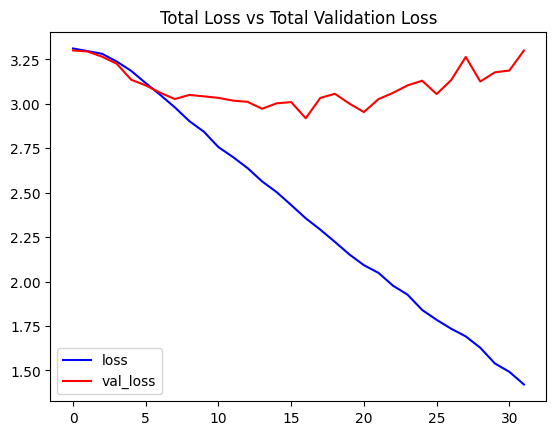

In [35]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

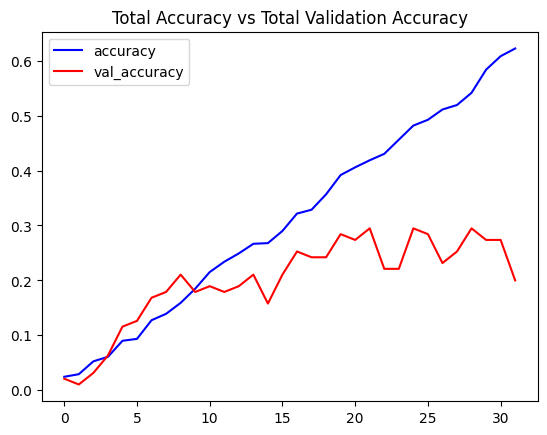

In [36]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

## 4. Making Prediction

1. predict_on_video(function to perform prediction on a video File)
2. get_most_likely_word(function to get most likely word in set of words)

In [70]:
w1_u = ['میں', 'آپ', 'ہم', 'وہ']
w2_k_u = ['کیسے', 'کونسا', 'کدھر', 'کتنے']
w3_u = ['ہوں', 'تھا', 'ہے', 'تھے']
w4_k_u = ['جی', 'ہاں', 'نہیں']
w5_u = ['کیوں', 'کب', 'کون']
w6_k_u = ['ایک', 'دو', 'تین', 'چار', 'پانچھ', 'چھے', 'سات', 'آٹھ', 'نوں']

In [71]:
word_list = [w1_u, w2_k_u, w3_u, w4_k_u, w5_u, w6_k_u]

In [72]:
word_list

[['میں', 'آپ', 'ہم', 'وہ'],
 ['کیسے', 'کونسا', 'کدھر', 'کتنے'],
 ['ہوں', 'تھا', 'ہے', 'تھے'],
 ['جی', 'ہاں', 'نہیں'],
 ['کیوں', 'کب', 'کون'],
 ['ایک', 'دو', 'تین', 'چار', 'پانچھ', 'چھے', 'سات', 'آٹھ', 'نوں']]

In [20]:
# function to get most likely word in a given set of words
def get_most_likely_word(word_list, CLASSES_LIST, res):
    
    prob = float(0.0)
    pred = ''
    
    ls = []

    for i in word_list:
        index = CLASSES_LIST.index(i)
        tmp_prob = res[index]
              
        if tmp_prob >  prob:
            prob = tmp_prob
            pred = i
    
    return pred,prob

#word = get_most_likely_word(w6_k_u, CLASSES_LIST, res)
#print(word)

In [62]:

# importing libraries
import cv2
from lips import crop_lips
import mediapipe as mp

mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities


# Declare a queue to store video frames.
frames_queue = deque(maxlen = SEQUENCE_LENGTH)

# Initialize a variable to store the predicted action being performed in the video.
predicted_class_name = ''

sentence = []
predictions = []
threshold = 0.0 # Result rendered only if they are above this threshold

# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture("..\\Dataset\\Urdu\\6\\mein_kidhar_tha_han_kab_paanch\\_video.avi")
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Check if camera opened successfully
if (cap.isOpened()== False):
    print("Error opening video file")


preds = []

w0 = []
w1 = []
w2 = []
w3 = []
w4 = []
w5 = []


cnt = 0
with mp_holistic.Holistic(min_detection_confidence=0.1, min_tracking_confidence=0.1) as holistic:    
    # Read until video is completed
    while(cap.isOpened()):

        # Capture frame-by-frame
        ret, frame = cap.read()
        
        # If frame correctly read only then performing predictions
        if ret == True:
            
            # Cropping lips
            cropped_image = crop_lips(frame, holistic)

            # Normalizing the cropped frame
            normalized_frame = cropped_image / 255    
            
            # Appending the pre-processed frame into the frames list.
            frames_queue.append(normalized_frame)
            
            # Check if the number of frames in the queue are equal to the fixed sequence length.
            if len(frames_queue) == SEQUENCE_LENGTH:

                # Pass the normalized frames to the model and get the predicted probabilities.
                res = LRCN_model.predict(np.expand_dims(frames_queue, axis = 0))[0]

                # Appending prediction in the Predictions List
                predictions.append(np.argmax(res))
                
                #preds.append(get_most_likely_word(word_list[0], CLASSES_LIST, res))
                #preds.append(get_most_likely_word(word_list[1], CLASSES_LIST, res))
                #preds.append(get_most_likely_word(word_list[2], CLASSES_LIST, res))
                #preds.append(get_most_likely_word(word_list[3], CLASSES_LIST, res))
                #preds.append(get_most_likely_word(word_list[4], CLASSES_LIST, res))
                #preds.append(get_most_likely_word(word_list[5], CLASSES_LIST, res))
                #sentence.append(pred)
                
                p0_w, p0_acc = get_most_likely_word(word_list[0], CLASSES_LIST, res)
                if p0_acc > threshold:
                    w0.append([p0_w, p0_acc])
                
                p1_w, p1_acc = get_most_likely_word(word_list[1], CLASSES_LIST, res)
                if p1_acc > threshold:
                    w1.append([p1_w, p1_acc])
                
                p2_w, p2_acc = get_most_likely_word(word_list[2], CLASSES_LIST, res)
                if p2_acc > threshold:
                    w2.append([p2_w, p2_acc])
                    
                p3_w, p3_acc = get_most_likely_word(word_list[3], CLASSES_LIST, res)
                if p3_acc > threshold:
                    w3.append([p3_w, p3_acc])
                
                p4_w, p4_acc = get_most_likely_word(word_list[4], CLASSES_LIST, res)
                if p4_acc > threshold:
                    w4.append([p4_w,p4_acc])
                
                p5_w, p5_acc = get_most_likely_word(word_list[5], CLASSES_LIST, res)
                if p5_acc > threshold:
                    w5.append([p5_w,p5_acc])
                

                
                #print(get_most_likely_word(word_list[5], CLASSES_LIST, res))
                '''if np.unique(predictions[-5:])[0] == np.argmax(res):
                    if res[np.argmax(res)] > threshold:
                        print(CLASSES_LIST[np.argmax(res)])
                        if len(sentence) > 0:
                            if CLASSES_LIST[np.argmax(res)] != sentence[-1]:
                                sentence.append(CLASSES_LIST[np.argmax(res)])
                        else:
                            sentence.append(CLASSES_LIST[np.argmax(res)])
                '''
                
                if len(sentence) < 8:
                    
                    sentence.extend(np.unique(preds))
       
            
            #print(sentence)
            
            #cv2.putText(frame, ' '.join(sentence) , (2, 30),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            # Display the resulting frame
            #cv2.imshow('Frame', frame)
            

        # Press Q on keyboard to exit
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break

        # Break the loop
        else:
            break
  

 # When everything done, release the video capture object
cap.release()
  
# Closes all the frames
cv2.destroyAllWindows()

print(len(w0))
print(len(w1))
print(len(w2))
print(len(w3))
print(len(w4))
print(len(w5))

1/1 [==============================] - 0s 19ms/step
82
82
82
82
82
82


In [86]:
from ipywidgets import IntProgress
from IPython.display import display
import cv2
from lips import crop_lips
import mediapipe as mp

# file_path = "..\\Dataset\\Urdu\\6\\aap_kitne_tha_han_kyun_ek\\_video.avi"

def predict_word_level(file_path, word_list, CLASSES_LIST, SEQUENCE_LENGTH):
    mp_holistic = mp.solutions.holistic  # Holistic model
    mp_drawing = mp.solutions.drawing_utils  # Drawing utilities


    # Declare a queue to store video frames.
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)

    # Initialize a variable to store the predicted action being performed in the video.
    predicted_class_name = ''

    sentence = []
    predictions = []
    threshold = 0.0 # Result rendered only if they are above this threshold

    # Create a VideoCapture object and read from input file
    cap = cv2.VideoCapture(file_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    win_size = int((total_frames - 12) / 6) 

    w_cnt = 0

    # Progress bar
    f = IntProgress(min=0, max=total_frames-12) # instantiate the bar
    display(f) # display the bar

    # Check if camera opened successfully
    if (cap.isOpened()== False):
        print("Error opening video file")


    preds = []

    w0 = []
    w1 = []
    w2 = []
    w3 = []
    w4 = []
    w5 = []


    cnt = 0
    with mp_holistic.Holistic(min_detection_confidence=0.1, min_tracking_confidence=0.1) as holistic:    
        # Read until video is completed
        while(cap.isOpened()):

            # Capture frame-by-frame
            ret, frame = cap.read()

            # If frame correctly read only then performing predictions
            if ret == True:

                # Cropping lips
                cropped_image = crop_lips(frame, holistic)

                # Normalizing the cropped frame
                normalized_frame = cropped_image / 255    

                # Appending the pre-processed frame into the frames list.
                frames_queue.append(normalized_frame)

                # Check if the number of frames in the queue are equal to the fixed sequence length.
                if len(frames_queue) == SEQUENCE_LENGTH:

                    # Pass the normalized frames to the model and get the predicted probabilities.
                    res = LRCN_model.predict(np.expand_dims(frames_queue, axis = 0), verbose=0)[0]

                    # Appending prediction in the Predictions List
                    predictions.append(np.argmax(res))

                    #preds.append(get_most_likely_word(word_list[0], CLASSES_LIST, res))
                    #preds.append(get_most_likely_word(word_list[1], CLASSES_LIST, res))
                    #preds.append(get_most_likely_word(word_list[2], CLASSES_LIST, res))
                    #preds.append(get_most_likely_word(word_list[3], CLASSES_LIST, res))
                    #preds.append(get_most_likely_word(word_list[4], CLASSES_LIST, res))
                    #preds.append(get_most_likely_word(word_list[5], CLASSES_LIST, res))
                    #sentence.append(pred)

                    if w_cnt < win_size:
                        p0_w, p0_acc = get_most_likely_word(word_list[0], CLASSES_LIST, res)
                        if p0_acc > threshold:
                            w0.append([p0_w, p0_acc])



                    if w_cnt > win_size and w_cnt < (2*win_size):
                        p1_w, p1_acc = get_most_likely_word(word_list[1], CLASSES_LIST, res)
                        if p1_acc > threshold:
                            w1.append([p1_w, p1_acc])

                    if w_cnt > (2*win_size) and w_cnt < (3*win_size):
                        p2_w, p2_acc = get_most_likely_word(word_list[2], CLASSES_LIST, res)
                        if p2_acc > threshold:
                            w2.append([p2_w, p2_acc])

                    if w_cnt > (3*win_size) and w_cnt < (4*win_size):
                        p3_w, p3_acc = get_most_likely_word(word_list[3], CLASSES_LIST, res)
                        if p3_acc > threshold:
                            w3.append([p3_w, p3_acc])

                    if w_cnt > (4*win_size) and w_cnt < (5*win_size):
                        p4_w, p4_acc = get_most_likely_word(word_list[4], CLASSES_LIST, res)
                        if p4_acc > threshold:
                            w4.append([p4_w,p4_acc])

                    if w_cnt > (5*win_size) :
                        p5_w, p5_acc = get_most_likely_word(word_list[5], CLASSES_LIST, res)
                        if p5_acc > threshold:
                            w5.append([p5_w,p5_acc])


                    w_cnt += 1

                    #Progress bar variables
                    f.value += 1 # signal to increment the progress bar

                    #print(get_most_likely_word(word_list[5], CLASSES_LIST, res))
                    '''if np.unique(predictions[-5:])[0] == np.argmax(res):
                        if res[np.argmax(res)] > threshold:
                            print(CLASSES_LIST[np.argmax(res)])
                            if len(sentence) > 0:
                                if CLASSES_LIST[np.argmax(res)] != sentence[-1]:
                                    sentence.append(CLASSES_LIST[np.argmax(res)])
                            else:
                                sentence.append(CLASSES_LIST[np.argmax(res)])
                    '''

                    if len(sentence) < 8:

                        sentence.extend(np.unique(preds))


                #print(sentence)

                #cv2.putText(frame, ' '.join(sentence) , (2, 30),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                # Display the resulting frame
                #cv2.imshow('Frame', frame)


            # Press Q on keyboard to exit
                if cv2.waitKey(25) & 0xFF == ord('q'):
                    break

            # Break the loop
            else:
                break


     # When everything done, release the video capture object
    cap.release()

    # Closes all the frames
    cv2.destroyAllWindows()
    
    return [w0, w1, w2, w3, w4, w5]

In [88]:
file_path = "..\\Dataset\\Urdu\\6\\aap_kitne_tha_han_kyun_ek\\_video.avi"

prediction = predict_word_level(file_path, word_list, CLASSES_LIST, SEQUENCE_LENGTH)

IntProgress(value=0, max=83)

In [43]:
w0

[['آپ', 0.9173111],
 ['آپ', 0.9422089],
 ['آپ', 0.91866165],
 ['آپ', 0.78640306],
 ['آپ', 0.70065904],
 ['آپ', 0.69467306],
 ['آپ', 0.64607507],
 ['آپ', 0.6723246],
 ['آپ', 0.6299536],
 ['آپ', 0.5606654],
 ['آپ', 0.133201],
 ['آپ', 0.088064946],
 ['آپ', 0.08761572],
 ['آپ', 0.11361515],
 ['آپ', 0.14550371],
 ['آپ', 0.12692645],
 ['آپ', 0.2238348],
 ['آپ', 0.35460055],
 ['آپ', 0.3689546],
 ['آپ', 0.37429127],
 ['آپ', 0.39098766],
 ['آپ', 0.25363055],
 ['آپ', 0.1264291],
 ['آپ', 0.32304353],
 ['آپ', 0.37421986],
 ['آپ', 0.4234264],
 ['آپ', 0.892332],
 ['آپ', 0.876484],
 ['آپ', 0.879007],
 ['آپ', 0.92051125],
 ['آپ', 0.9544213],
 ['آپ', 0.56094015],
 ['آپ', 0.0061974083],
 ['آپ', 0.02280366],
 ['آپ', 0.017913846],
 ['وہ', 0.011181289],
 ['وہ', 0.014636341],
 ['آپ', 0.060483158],
 ['آپ', 0.03688809],
 ['آپ', 0.057711538],
 ['آپ', 0.108581655],
 ['آپ', 0.076641016],
 ['آپ', 0.033091776],
 ['آپ', 0.22122106],
 ['آپ', 0.2962238],
 ['آپ', 0.40478006],
 ['آپ', 0.57138777],
 ['آپ', 0.5168233],
 

In [47]:
for i in range(0, len(w5)):
    print(i, " ", w5[i])

0   ['ایک', 0.10666649]
1   ['آٹھ', 0.15501854]
2   ['آٹھ', 0.032894082]
3   ['پانچھ', 0.009119958]
4   ['پانچھ', 0.02893465]
5   ['پانچھ', 0.06517752]
6   ['پانچھ', 0.15323508]
7   ['پانچھ', 0.25976986]
8   ['پانچھ', 0.36251685]
9   ['پانچھ', 0.29112312]
10   ['پانچھ', 0.38001415]
11   ['تین', 0.007023743]
12   ['تین', 0.007668283]
13   ['تین', 0.011691475]
14   ['تین', 0.16691391]
15   ['تین', 0.6376088]


In [64]:
for i in range(0, len(w5)):
    print(i, " ", w4[i]," ", w5[i])

0   ['کیوں', 0.00029239958]   ['ایک', 0.0057234075]
1   ['کیوں', 0.00014329815]   ['ایک', 0.0028787146]
2   ['کیوں', 0.00011644554]   ['ایک', 0.0028040046]
3   ['کیوں', 0.00018766064]   ['ایک', 0.017056515]
4   ['کیوں', 0.00039994004]   ['ایک', 0.038429394]
5   ['کیوں', 0.00067757117]   ['ایک', 0.09774765]
6   ['کیوں', 0.0006919108]   ['ایک', 0.11644886]
7   ['کون', 0.00046563786]   ['ایک', 0.10282201]
8   ['کون', 0.0005919506]   ['ایک', 0.11512396]
9   ['کون', 0.00085861434]   ['ایک', 0.1243332]
10   ['کون', 0.0009358187]   ['ایک', 0.121799305]
11   ['کون', 0.0010012165]   ['ایک', 0.14035107]
12   ['کون', 0.0011199312]   ['ایک', 0.17905678]
13   ['کون', 0.0017958129]   ['ایک', 0.2351971]
14   ['کون', 0.0024050917]   ['ایک', 0.36988357]
15   ['کون', 0.0013673196]   ['ایک', 0.39990824]
16   ['کون', 0.0012060825]   ['ایک', 0.4446215]
17   ['کون', 0.0009345247]   ['ایک', 0.29518965]
18   ['کون', 0.00069138885]   ['ایک', 0.3125571]
19   ['کون', 0.0006541525]   ['ایک', 0.312597]
20   ['کون'

### 4.1 Sentence Prediction Functions

In [22]:
# Returns word with highest probability in a window
def highest_prob_word(words):
    
    w = ''
    acc = 0
    for i in words:
        if i[1] > acc:
            w = i[0]
    
    return w

In [55]:
# Returns most frequently occuring word in a window
def most_freq_word(words):
    
    tmp_list = []
    
    for i in words:
        tmp_list.append(i[0])
    
    return max(set(tmp_list), key = tmp_list.count)

print(most_freq_word(w5))

پانچھ


In [99]:
# General function to parse sentence [args : prediction results, function to be used for getting predicted words]
def parse_sentence(prediction, func):
    
    sen = func(prediction[0])+" "+func(prediction[1])+" "+func(prediction[2])+" "+func(prediction[3])+" "+func(prediction[4])+" "+func(prediction[5])
    
    return sen

###### - Sentence predicted using `most_freq_word()` :

In [100]:
print(most_freq_word(w0),most_freq_word(w1),most_freq_word(w2),most_freq_word(w3),most_freq_word(w4),most_freq_word(w5))

آپ کتنے تھے ہاں کون ایک


In [107]:
file_path = "..\\Dataset\\Urdu\\6\\aap_konsa_thay_jee_kon_ek\\_video.avi"

prediction = predict_word_level(file_path, word_list, CLASSES_LIST, SEQUENCE_LENGTH)

print(parse_sentence(prediction, most_freq_word))

IntProgress(value=0, max=79)

آپ کتنے تھے نہیں کون ایک


###### - Sentence predicted using `highest_prob_word()` :

In [69]:
print(highest_prob_word(w0),highest_prob_word(w1),highest_prob_word(w2),highest_prob_word(w3),highest_prob_word(w4),highest_prob_word(w5))

آپ کتنے تھے جی کب تین


In [106]:
file_path = "..\\Dataset\\Urdu\\6\\aap_konsa_hai_jee_kab_do\\_video.avi"

prediction = predict_word_level(file_path, word_list, CLASSES_LIST, SEQUENCE_LENGTH)

print(parse_sentence(prediction, highest_prob_word))

IntProgress(value=0, max=83)

آپ کیسے تھے نہیں کیوں ایک


### 4.2 Calculating Word error rate (WER)
- Currently performing on single speaker

###### - WER of `most_freq_words()`

In [121]:
from Dataset import get_sentences

sentences = get_sentences('..\\Dictionary\\roman_urdu_sentences.txt')

speaker_id = 6

#file_path = "..\\Dataset\\Urdu\\6\\aap_konsa_thay_jee_kon_ek\\_video.avi"

x_sen = []
y_sen = []

cnt = 0

for i in sentences:
    
    print(cnt)
    
    # Appending in actual sentence list
    x_sen.append(i)
    
    sen = i.replace(' ','_')
    
    # Parsing filepath of the video file
    file_path = "..\\Dataset\\Urdu\\" + str(speaker_id) + "\\" + sen + "\\_video.avi"

    # Making prediction on video and parsing sentencing
    prediction = predict_word_level(file_path, word_list, CLASSES_LIST, SEQUENCE_LENGTH)
    predicted_sentence = parse_sentence(prediction, most_freq_word)
    
    # Appending in predicted sentence list
    y_sen.append(predicted_sentence)
    
    cnt += 1




0


IntProgress(value=0, max=83)

1


IntProgress(value=0, max=83)

2


IntProgress(value=0, max=79)

3


IntProgress(value=0, max=83)

4


IntProgress(value=0, max=82)

5


IntProgress(value=0, max=82)

6


IntProgress(value=0, max=83)

7


IntProgress(value=0, max=85)

8


IntProgress(value=0, max=83)

9


IntProgress(value=0, max=82)

10


IntProgress(value=0, max=81)

11


IntProgress(value=0, max=82)

12


IntProgress(value=0, max=82)

13


IntProgress(value=0, max=82)

14


IntProgress(value=0, max=83)

15


IntProgress(value=0, max=82)

16


IntProgress(value=0, max=82)

17


IntProgress(value=0, max=82)

18


IntProgress(value=0, max=82)

19


IntProgress(value=0, max=83)

20


IntProgress(value=0, max=82)

21


IntProgress(value=0, max=82)

22


IntProgress(value=0, max=83)

23


IntProgress(value=0, max=84)

24


IntProgress(value=0, max=82)

25


IntProgress(value=0, max=82)

26


IntProgress(value=0, max=82)

27


IntProgress(value=0, max=79)

28


IntProgress(value=0, max=83)

29


IntProgress(value=0, max=82)

30


IntProgress(value=0, max=82)

31


IntProgress(value=0, max=83)

32


IntProgress(value=0, max=82)

33


IntProgress(value=0, max=82)

34


IntProgress(value=0, max=83)

35


IntProgress(value=0, max=83)

36


IntProgress(value=0, max=78)

37


IntProgress(value=0, max=82)

38


IntProgress(value=0, max=78)

39


IntProgress(value=0, max=82)

40


IntProgress(value=0, max=83)

41


IntProgress(value=0, max=82)

42


IntProgress(value=0, max=82)

43


IntProgress(value=0, max=82)

44


IntProgress(value=0, max=85)

45


IntProgress(value=0, max=82)

46


IntProgress(value=0, max=84)

47


IntProgress(value=0, max=82)

48


IntProgress(value=0, max=82)

49


IntProgress(value=0, max=82)

50


IntProgress(value=0, max=82)

51


IntProgress(value=0, max=82)

52


IntProgress(value=0, max=83)

53


IntProgress(value=0, max=82)

54


IntProgress(value=0, max=83)

55


IntProgress(value=0, max=82)

56


IntProgress(value=0, max=83)

57


IntProgress(value=0, max=82)

58


IntProgress(value=0, max=82)

59


IntProgress(value=0, max=83)

60


IntProgress(value=0, max=83)

61


IntProgress(value=0, max=83)

62


IntProgress(value=0, max=85)

63


IntProgress(value=0, max=79)

64


IntProgress(value=0, max=77)

65


IntProgress(value=0, max=82)

66


IntProgress(value=0, max=82)

67


IntProgress(value=0, max=82)

68


IntProgress(value=0, max=83)

69


IntProgress(value=0, max=83)

70


IntProgress(value=0, max=82)

71


IntProgress(value=0, max=82)

72


IntProgress(value=0, max=79)

73


IntProgress(value=0, max=83)

74


IntProgress(value=0, max=79)

75


IntProgress(value=0, max=82)

76


IntProgress(value=0, max=82)

77


IntProgress(value=0, max=82)

78


IntProgress(value=0, max=82)

79


IntProgress(value=0, max=82)

80


IntProgress(value=0, max=82)

81


IntProgress(value=0, max=82)

82


IntProgress(value=0, max=82)

83


IntProgress(value=0, max=85)

84


IntProgress(value=0, max=82)

85


IntProgress(value=0, max=86)

86


IntProgress(value=0, max=82)

87


IntProgress(value=0, max=82)

88


IntProgress(value=0, max=78)

89


IntProgress(value=0, max=79)

90


IntProgress(value=0, max=83)

91


IntProgress(value=0, max=82)

92


IntProgress(value=0, max=82)

93


IntProgress(value=0, max=82)

94


IntProgress(value=0, max=79)

95


IntProgress(value=0, max=79)

96


IntProgress(value=0, max=82)

97


IntProgress(value=0, max=82)

98


IntProgress(value=0, max=82)

99


IntProgress(value=0, max=82)

100


IntProgress(value=0, max=83)

101


IntProgress(value=0, max=83)

102


IntProgress(value=0, max=82)

103


IntProgress(value=0, max=82)

104


IntProgress(value=0, max=82)

105


IntProgress(value=0, max=76)

106


IntProgress(value=0, max=82)

107


IntProgress(value=0, max=82)

In [141]:
#Function to get urdu dictionary sentences
def get_urdu_sentences(path):
    #path = '..\\Dictionary\\roman_urdu_sentences.txt'

    # Using readlines()
    file = open(path, 'r', encoding='utf-8')
    lines = file.readlines()

    for i in range(len(lines)):
        lines[i] = lines[i].replace("\n", "")

    return lines

In [150]:
# Library to calculate WER
from jiwer import wer

#print(len(x_sen))
#print(len(y_sen))
urdu_sen = get_urdu_sentences('..\\Dictionary\\urdu_sentences.txt')

total_wer = 0

#print("       Predicted       -          Actual")
for i in range(0, len(urdu_sen)):
    #print(urdu_sen[i], " --- " , y_sen[i])
    
    #arg = (ref, hypothesis)
    total_wer += wer(urdu_sen[i], y_sen[i])

avg_wer = total_wer / len(urdu_sen)
    
print(avg_wer)    

0.6867283950617283


- Hence using the `most_freq_word()` function we get 0.68 WER (Trained only on single speaker and tested on the same speaker aswell)

###### - WER of `highest_prob_word()`

In [151]:
from Dataset import get_sentences

sentences = get_sentences('..\\Dictionary\\roman_urdu_sentences.txt')

speaker_id = 6

#file_path = "..\\Dataset\\Urdu\\6\\aap_konsa_thay_jee_kon_ek\\_video.avi"

x_sen = []
y_sen = []

cnt = 0

for i in sentences:
    
    print(cnt)
    
    # Appending in actual sentence list
    x_sen.append(i)
    
    sen = i.replace(' ','_')
    
    # Parsing filepath of the video file
    file_path = "..\\Dataset\\Urdu\\" + str(speaker_id) + "\\" + sen + "\\_video.avi"

    # Making prediction on video and parsing sentencing
    prediction = predict_word_level(file_path, word_list, CLASSES_LIST, SEQUENCE_LENGTH)
    predicted_sentence = parse_sentence(prediction, highest_prob_word)
    
    # Appending in predicted sentence list
    y_sen.append(predicted_sentence)
    
    cnt += 1




0


IntProgress(value=0, max=83)

1


IntProgress(value=0, max=83)

2


IntProgress(value=0, max=79)

3


IntProgress(value=0, max=83)

4


IntProgress(value=0, max=82)

5


IntProgress(value=0, max=82)

6


IntProgress(value=0, max=83)

7


IntProgress(value=0, max=85)

8


IntProgress(value=0, max=83)

9


IntProgress(value=0, max=82)

10


IntProgress(value=0, max=81)

11


IntProgress(value=0, max=82)

12


IntProgress(value=0, max=82)

13


IntProgress(value=0, max=82)

14


IntProgress(value=0, max=83)

15


IntProgress(value=0, max=82)

16


IntProgress(value=0, max=82)

17


IntProgress(value=0, max=82)

18


IntProgress(value=0, max=82)

19


IntProgress(value=0, max=83)

20


IntProgress(value=0, max=82)

21


IntProgress(value=0, max=82)

22


IntProgress(value=0, max=83)

23


IntProgress(value=0, max=84)

24


IntProgress(value=0, max=82)

25


IntProgress(value=0, max=82)

26


IntProgress(value=0, max=82)

27


IntProgress(value=0, max=79)

28


IntProgress(value=0, max=83)

29


IntProgress(value=0, max=82)

30


IntProgress(value=0, max=82)

31


IntProgress(value=0, max=83)

32


IntProgress(value=0, max=82)

33


IntProgress(value=0, max=82)

34


IntProgress(value=0, max=83)

35


IntProgress(value=0, max=83)

36


IntProgress(value=0, max=78)

37


IntProgress(value=0, max=82)

38


IntProgress(value=0, max=78)

39


IntProgress(value=0, max=82)

40


IntProgress(value=0, max=83)

41


IntProgress(value=0, max=82)

42


IntProgress(value=0, max=82)

43


IntProgress(value=0, max=82)

44


IntProgress(value=0, max=85)

45


IntProgress(value=0, max=82)

46


IntProgress(value=0, max=84)

47


IntProgress(value=0, max=82)

48


IntProgress(value=0, max=82)

49


IntProgress(value=0, max=82)

50


IntProgress(value=0, max=82)

51


IntProgress(value=0, max=82)

52


IntProgress(value=0, max=83)

53


IntProgress(value=0, max=82)

54


IntProgress(value=0, max=83)

55


IntProgress(value=0, max=82)

56


IntProgress(value=0, max=83)

57


IntProgress(value=0, max=82)

58


IntProgress(value=0, max=82)

59


IntProgress(value=0, max=83)

60


IntProgress(value=0, max=83)

61


IntProgress(value=0, max=83)

62


IntProgress(value=0, max=85)

63


IntProgress(value=0, max=79)

64


IntProgress(value=0, max=77)

65


IntProgress(value=0, max=82)

66


IntProgress(value=0, max=82)

67


IntProgress(value=0, max=82)

68


IntProgress(value=0, max=83)

69


IntProgress(value=0, max=83)

70


IntProgress(value=0, max=82)

71


IntProgress(value=0, max=82)

72


IntProgress(value=0, max=79)

73


IntProgress(value=0, max=83)

74


IntProgress(value=0, max=79)

75


IntProgress(value=0, max=82)

76


IntProgress(value=0, max=82)

77


IntProgress(value=0, max=82)

78


IntProgress(value=0, max=82)

79


IntProgress(value=0, max=82)

80


IntProgress(value=0, max=82)

81


IntProgress(value=0, max=82)

82


IntProgress(value=0, max=82)

83


IntProgress(value=0, max=85)

84


IntProgress(value=0, max=82)

85


IntProgress(value=0, max=86)

86


IntProgress(value=0, max=82)

87


IntProgress(value=0, max=82)

88


IntProgress(value=0, max=78)

89


IntProgress(value=0, max=79)

90


IntProgress(value=0, max=83)

91


IntProgress(value=0, max=82)

92


IntProgress(value=0, max=82)

93


IntProgress(value=0, max=82)

94


IntProgress(value=0, max=79)

95


IntProgress(value=0, max=79)

96


IntProgress(value=0, max=82)

97


IntProgress(value=0, max=82)

98


IntProgress(value=0, max=82)

99


IntProgress(value=0, max=82)

100


IntProgress(value=0, max=83)

101


IntProgress(value=0, max=83)

102


IntProgress(value=0, max=82)

103


IntProgress(value=0, max=82)

104


IntProgress(value=0, max=82)

105


IntProgress(value=0, max=76)

106


IntProgress(value=0, max=82)

107


IntProgress(value=0, max=82)

In [152]:
# Library to calculate WER
from jiwer import wer

#print(len(x_sen))
#print(len(y_sen))
urdu_sen = get_urdu_sentences('..\\Dictionary\\urdu_sentences.txt')

total_wer = 0

#print("       Predicted       -          Actual")
for i in range(0, len(urdu_sen)):
    #print(urdu_sen[i], " --- " , y_sen[i])
    
    #arg = (ref, hypothesis)
    total_wer += wer(urdu_sen[i], y_sen[i])

avg_wer = total_wer / len(urdu_sen)
    
print(avg_wer)    

0.6975308641975313


In [20]:
from jiwer import wer

print(wer("آپ کتنے ہوں ہاں کون پانچھ","پ کیژا وہ جی کو چھ"))
print(wer("hello two","hello two"))

1.0
0.0


In [18]:
def wer1(r, h):
    """
    Calculation of WER with Levenshtein distance.

    Works only for iterables up to 254 elements (uint8).
    O(nm) time ans space complexity.

    Parameters
    ----------
    r : list
    h : list

    Returns
    -------
    int

    Examples
    --------
    >>> wer("who is there".split(), "is there".split())
    1
    >>> wer("who is there".split(), "".split())
    3
    >>> wer("".split(), "who is there".split())
    3
    """
    # initialisation
    import numpy

    d = numpy.zeros((len(r) + 1) * (len(h) + 1), dtype=numpy.uint8)
    d = d.reshape((len(r) + 1, len(h) + 1))
    for i in range(len(r) + 1):
        for j in range(len(h) + 1):
            if i == 0:
                d[0][j] = j
            elif j == 0:
                d[i][0] = i

    # computation
    for i in range(1, len(r) + 1):
        for j in range(1, len(h) + 1):
            if r[i - 1] == h[j - 1]:
                d[i][j] = d[i - 1][j - 1]
            else:
                substitution = d[i - 1][j - 1] + 1
                insertion = d[i][j - 1] + 1
                deletion = d[i - 1][j] + 1
                d[i][j] = min(substitution, insertion, deletion)

    return d[len(r)][len(h)]

print(wer1("آپ کتنے ہوں ہاں کون پانچھ".split(),"پ کیژا وہ جی کو چھ".split()))

6


- Hence using the `highest_prob_word()` function we get 0.68 WER (Trained only on single speaker and tested on the same speaker aswell)

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''<br></br>
Ignore below atm
### Predictions

In [18]:
from lips import crop_lips
import mediapipe as mp


mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities

def predict_on_video(video_file_path, SEQUENCE_LENGTH):
    '''
    This function will perform action recognition on a video using the LRCN model.
    Args:
    video_file_path:  The path of the video stored in the disk on which the action recognition is to be performed.
    output_file_path: The path where the ouput video with the predicted action being performed overlayed will be stored.
    SEQUENCE_LENGTH:  The fixed number of frames of a video that can be passed to the model as one sequence.
    '''

    # Initialize the VideoCapture object to read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)

    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))


    # Declare a queue to store video frames.
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)

    # Initialize a variable to store the predicted action being performed in the video.
    predicted_class_name = ''

    with mp_holistic.Holistic(min_detection_confidence=0.1, min_tracking_confidence=0.1) as holistic:
        # Iterate until the video is accessed successfully.
        while video_reader.isOpened():

            # Read the frame.
            ok, frame = video_reader.read() 

            # Check if frame is not read properly then break the loop.
            if not ok:
                print("NOT OK")
                break
            
            cropped_image = crop_lips(frame, holistic)
            

            # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
            normalized_frame = cropped_image / 255

            # Appending the pre-processed frame into the frames list.
            frames_queue.append(normalized_frame)

            # Check if the number of frames in the queue are equal to the fixed sequence length.
            if len(frames_queue) == SEQUENCE_LENGTH:

                # Pass the normalized frames to the model and get the predicted probabilities.
                predicted_labels_probabilities = LRCN_model.predict(np.expand_dims(frames_queue, axis = 0))[0]

                # Get the index of class with highest probability.
                predicted_label = np.argmax(predicted_labels_probabilities)

                # Get the class name using the retrieved index.
                predicted_class_name = CLASSES_LIST[predicted_label]
                
                print(predicted_class_name)

            # Write predicted class name on top of the frame.
            cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            
            cv2.imshow("Result", frame)


        # Release the VideoCapture and VideoWriter objects.
        video_reader.release()


In [70]:
res = LRCN_model.predict(features_test)

8/8 [==============================] - 0s 20ms/step


In [71]:
print(len(res[0])) # Total 7 probablities
print(np.sum(res[0])) # All probablities will add up to 1

27
0.99999994


In [72]:
nu = 8

print("ACTUAL    : ", CLASSES_LIST[np.argmax(labels_test[nu])])
print("PREDICTED : ", CLASSES_LIST[np.argmax(res[nu])]) 

#print(res[0][nu]) # 'kese' has the probability of 0.99 (highest in the results)


ACTUAL    :  ہے
PREDICTED :  نہیں


In [23]:
#LRCN_model.load_weights("LRCN_model___Date_Time_2023_02_13__00_24_29___Loss_1.8407708406448364___Accuracy_0.4947916567325592.h5")

In [75]:
# Perform Action Recognition on the Test Video.
predict_on_video("..\\Dataset\\Urdu\\4\\aap_kese_tha_nai_kab_theen\\_video.avi", SEQUENCE_LENGTH)

1/1 [==============================] - 0s 31ms/step
تین
1/1 [==============================] - 0s 31ms/step
تین
1/1 [==============================] - 0s 41ms/step
نہیں
1/1 [==============================] - 0s 32ms/step
تین
1/1 [==============================] - 0s 24ms/step
تین
1/1 [==============================] - 0s 17ms/step
تین
1/1 [==============================] - 0s 16ms/step
تین
1/1 [==============================] - 0s 40ms/step
نہیں
1/1 [==============================] - 0s 21ms/step
نہیں
1/1 [==============================] - 0s 32ms/step
نہیں
1/1 [==============================] - 0s 40ms/step
نہیں
1/1 [==============================] - 0s 32ms/step
نہیں
1/1 [==============================] - 0s 24ms/step
نہیں
1/1 [==============================] - 0s 24ms/step
نہیں
1/1 [==============================] - 0s 24ms/step
تھا
1/1 [==============================] - 0s 31ms/step
تھا
1/1 [==============================] - 0s 32ms/step
تھا
1/1 [==============================] - 0

## Temp model

In [11]:
model = Sequential()

# Define the Model Architecture.
########################################################################################################################

model.add(TimeDistributed(Conv2D(16, (3, 3), padding='valid',activation = 'relu'),
                          input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

model.add(TimeDistributed(MaxPooling2D((2, 2)))) 
model.add(TimeDistributed(Dropout(0.25)))

model.add(TimeDistributed(Conv2D(32, (3, 3), padding='valid',activation = 'relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(Dropout(0.25)))

model.add(TimeDistributed(Conv2D(64, (3, 3), padding='valid',activation = 'relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(Dropout(0.25)))

model.add(TimeDistributed(Conv2D(64, (3, 3), padding='valid',activation = 'relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
#model.add(TimeDistributed(Dropout(0.25)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(32)))

model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

########################################################################################################################

# Display the models summary.
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_50 (TimeDi  (None, 13, 48, 98, 16)   448       
 stributed)                                                      
                                                                 
 time_distributed_51 (TimeDi  (None, 13, 24, 49, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_52 (TimeDi  (None, 13, 24, 49, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_53 (TimeDi  (None, 13, 22, 47, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_54 (TimeDi  (None, 13, 11, 23, 32)  

In [9]:
# Important variables DEFINED IN PREPROCESSOR FILES
SEQUENCE_LENGTH = 13 
IMAGE_HEIGHT = 50 
IMAGE_WIDTH = 100
CLASSES_LIST = ['ہے', 'کیسے', 'چار', 'دو', 'چھے', 'وہ', 'جی', 'کب', 'پانچھ', 'تین', 'آپ', 'نوں', 'ہاں', 'میں', 'تھا', 'ہوں', 'نہیں', 'کیوں', 'کتنے', 'ایک', 'کون', 'تھے', 'ہم', 'آٹھ', 'کونسا', 'کدھر', 'سات']

In [10]:
def ctc_loss(y_true, y_pred, input_length, label_length, real_y_true_ts):
    return tf.keras.backend.ctc_batch_cost(real_y_true_ts, y_pred, input_length, label_length)

In [ ]:
model = Sequential()

# Define the Model Architecture.
########################################################################################################################

model.add(TimeDistributed(Conv2D(16, (3, 3), padding='valid',activation = 'relu'),
                          input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

model.add(TimeDistributed(MaxPooling2D((2, 2)))) 
model.add(TimeDistributed(Dropout(0.25)))

model.add(TimeDistributed(Conv2D(32, (3, 3), padding='valid',activation = 'relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(Dropout(0.25)))

model.add(TimeDistributed(Conv2D(64, (3, 3), padding='valid',activation = 'relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(Dropout(0.25)))

model.add(TimeDistributed(Conv2D(64, (3, 3), padding='valid',activation = 'relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
#model.add(TimeDistributed(Dropout(0.25)))

model.add(TimeDistributed(Flatten()))

model.add(LSTM(32))

model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

########################################################################################################################

# Display the models summary.
model.summary()

# Return the constructed LRCN model.
return model

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss=ctc_loss)

NameError: name 'Conv2d' is not defined

In [1]:

# importing libraries
import cv2
from lips import crop_lips
import mediapipe as mp

mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities

#SEQUENCE_LENGTH =

# Declare a queue to store video frames.
#frames_queue = deque(maxlen = SEQUENCE_LENGTH)

# Initialize a variable to store the predicted action being performed in the video.
predicted_class_name = ''

sentence = []
predictions = []
threshold = 0.0 # Result rendered only if they are above this threshold

# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture("..\\Dataset\\Urdu\\6\\mein_kidhar_tha_han_kab_paanch\\_video.avi")
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Check if camera opened successfully
if (cap.isOpened()== False):
    print("Error opening video file")


cnt = 0
with mp_holistic.Holistic(min_detection_confidence=0.1, min_tracking_confidence=0.1) as holistic:    
    # Read until video is completed
    while(cap.isOpened()):

        # Capture frame-by-frame
        ret, frame = cap.read()
        
        # If frame correctly read only then performing predictions
        if ret == True:
            
            # Cropping lips
            cropped_image = crop_lips(frame, holistic)

            # Normalizing the cropped frame
            normalized_frame = cropped_image / 255    
            
            # Appending the pre-processed frame into the frames list.
            #frames_queue.append(normalized_frame)
            
            # Check if the number of frames in the queue are equal to the fixed sequence length.
            """if len(frames_queue) == SEQUENCE_LENGTH:

                # Pass the normalized frames to the model and get the predicted probabilities.
                res = LRCN_model.predict(np.expand_dims(frames_queue, axis = 0))[0]

                # Appending prediction in the Predictions List
                predictions.append(np.argmax(res))

                
                if len(sentence) < 8:
                    
                    sentence.extend(np.unique(preds))
       
            """

            # Display the resulting frame
            cv2.imshow('Frame', frame)
            

        # Press Q on keyboard to exit
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break

        # Break the loop
        else:
            break
  

 # When everything done, release the video capture object
cap.release()
  
# Closes all the frames
cv2.destroyAllWindows()

In [12]:
#Passing image and model to the function
def mediapipe_detection(image, model):
    # Converting frame from BGR to RGB because model works on RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Color conversion (BGR to RGB)
    
    image.flags.writeable = False # Image not writeable anymore
    
    results = model.process(image)# Making prediction
    
    image.flags.writeable = True # Image is now writeable
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Color conversion (RGB to BGR)
    return image, results

def lip_movement_detected(results):
    diff = results.face_landmarks.landmark[14].y - results.face_landmarks.landmark[13].y
    if diff > 0.008:
        return True
    else:
        return False

In [ ]:
def crop_lips(frame, model):
    image_height, image_width, c = frame.shape

    #IMPORTANT VARIABLES
    # Defining width and height of resized frame
    width = 100
    height = 50

    # If no lips get detected by mediapipe then exception will be thrown
    try:
        # Making detections

        image, results = mediapipe_detection(frame, model)


        # NORAMALIZING POSITIONS OF LANDMARKS(Two lines below taken from
        x_px1 = min(math.floor(results.face_landmarks.landmark[212].x * image_width), image_width - 1)
        x_px2 = min(math.floor(results.face_landmarks.landmark[432].x * image_width), image_width - 1)
        y_px1 = min(math.floor(results.face_landmarks.landmark[94].y * image_height), image_height - 1)
        y_px2 = min(math.floor(results.face_landmarks.landmark[200].y * image_height), image_height - 1)

        # Cropping an image
        cropped_image = image[y_px1:y_px2, x_px1:x_px2]

        # Resizing the cropped image to Fixed resolution i.e. 300*150
        dim = (width, height)

        resized = cv2.resize(cropped_image, dim, interpolation=cv2.INTER_AREA)

    except:
        # If no lips detected plain black frame will be returned
        resized = np.zeros((height, width, 3), dtype=np.uint8)


    return resized

In [13]:
# import the opencv library
import cv2
import mediapipe as mp

mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities


#define a video capture object
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.1, min_tracking_confidence=0.1) as holistic:    

    while(cap.isOpened()):

        # Capture the video frame
        # by frame
        ret, frame = cap.read()
        txt = "Closed"
         # Making detections
        try:
            image, results = mediapipe_detection(frame, holistic)

            # Recording of frames would be started with 3 frames prior of lip movement
            if lip_movement_detected(results):
                txt = "OPEN"
            else:
                txt = "CLOSED"
        except:
            a=1
            

        cv2.putText(frame, txt, (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        
        # Display the resulting frame
        cv2.imshow('frame', frame)

        # the 'q' button is set as the
        # quitting button you may use any
        # desired button of your choice
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # After the loop release the cap object
    cap.release()
    # Destroy all the windows
    cv2.destroyAllWindows()

In [5]:
import cv2

# Function to record simple video of 4 seconds
# Args(camera_index; 1 = PC webcam, 1 = USB cam)
def record_vid(cam_index = 0):
    
    # Set the video capture device (webcam)
    cap = cv2.VideoCapture(cam_index)

    width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter('output.mp4',fourcc, 25.0, (width,height))

    # Set the duration of the video capture (in seconds)
    duration = 4

    # Capture frames for the specified duration
    start_time = cv2.getTickCount()
    while(int((cv2.getTickCount() - start_time)/cv2.getTickFrequency() * 1000) < duration*1000):
        ret, frame = cap.read()
        # Show the frame
        cv2.imshow('frame',frame)
        # Write the frame to the output file
        out.write(frame)
        # Wait for a key press to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture device and the output file
    cap.release()
    out.release()

record_vid(cam_index=0)